In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./final_cccf.csv')

In [3]:
df.head()

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0


In [4]:
df1=df.drop(['ss_username', 'cf_username', 'cc_username'], axis='columns')

In [5]:
df1.head()

,cf_rating,cc_rating
0,3449.0,3007.0
1,NaN,2906.0
2,NaN,2756.0
3,NaN,2696.0
4,1703.0,2673.0


In [6]:
df1.isnull().sum()

cf_rating    3838
cc_rating     995
dtype: int64

In [7]:
df1.dropna(inplace=True)

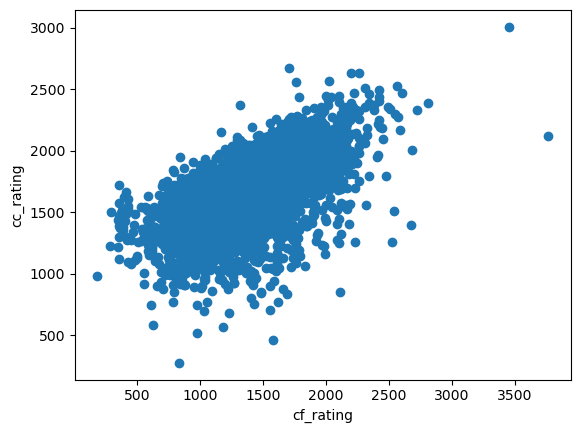

In [8]:
plt.scatter(df1['cf_rating'], df1['cc_rating'])
plt.xlabel('cf_rating')
plt.ylabel('cc_rating')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X=df1['cf_rating'].values.reshape(-1,1)
Y=df1['cc_rating'].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33,random_state=1)

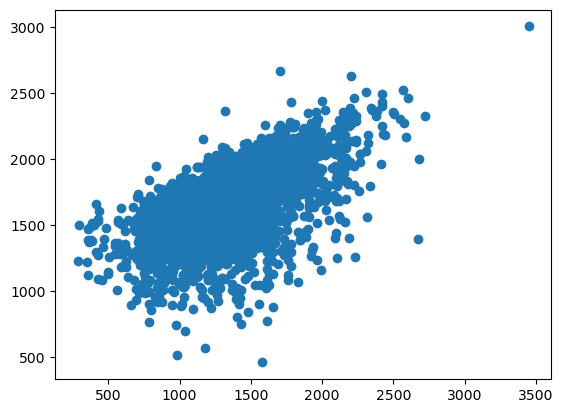

In [10]:
plt.scatter(X_train, Y_train)

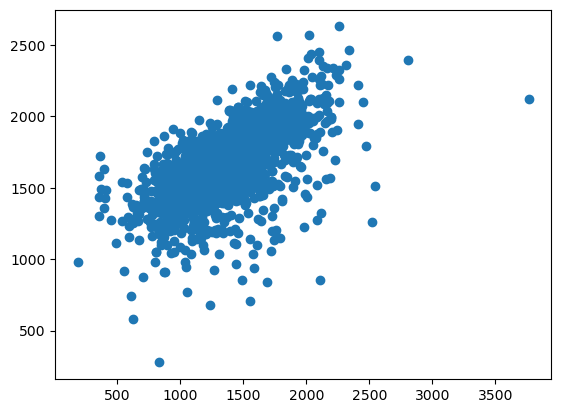

In [11]:
plt.scatter(X_test, Y_test)

In [12]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

0.3737728958242187


In [13]:
Y_predtr = model.predict(X_train)

In [14]:
residuals=np.abs(Y_train-Y_predtr)
leverage=1/X_train.size+((X_train-X_train.mean())**2)/(((X_train-X_train.mean())**2).sum())

In [15]:
X_train2=X_train[(residuals<(residuals.mean() + 2*residuals.std())) & (leverage<(leverage.mean() + 2*leverage.std()))]
Y_train2=Y_train[(residuals<(residuals.mean() + 2*residuals.std())) & (leverage<(leverage.mean() + 2*leverage.std()))]

In [16]:
print(X_train2.size, Y_train2.size)

3957 3957


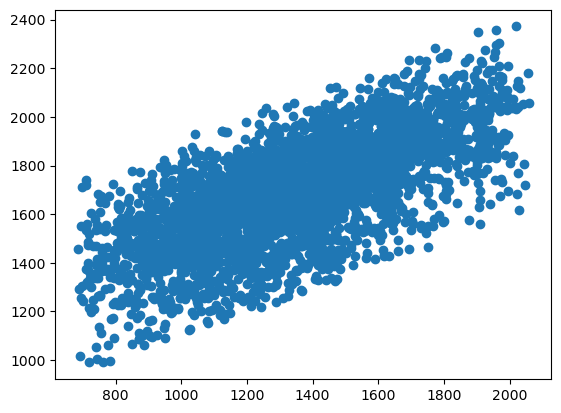

In [17]:
plt.scatter(X_train2, Y_train2)

In [18]:
model2=LinearRegression()
X_train2=X_train2.reshape(-1, 1)
Y_train2=Y_train2.reshape(-1, 1)
model2.fit(X_train2, Y_train2)
print(model2.score(X_test, Y_test))

0.36548873599704523


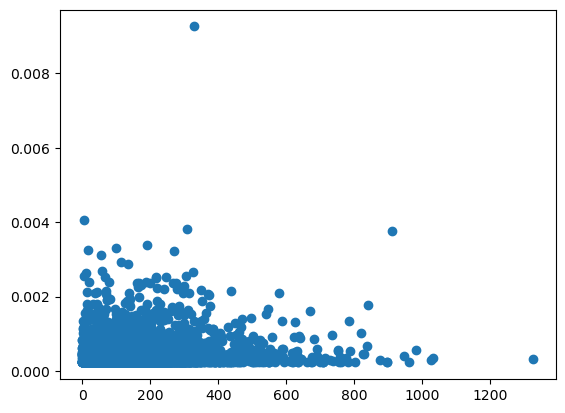

In [19]:
plt.scatter(residuals, leverage)

In [20]:
print(model2.intercept_, model2.coef_) 

[1012.22482268] [[0.50743633]]


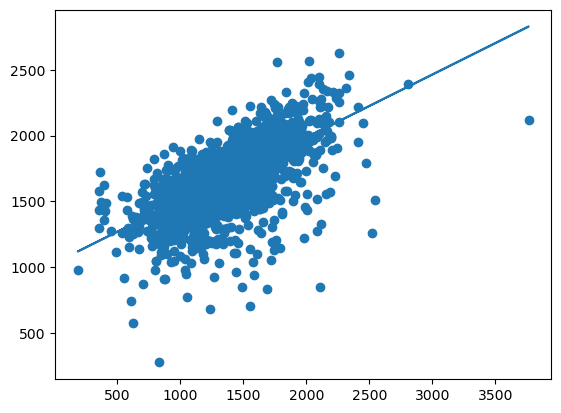

In [21]:
plt.scatter(X_test, Y_test)
Y_predte = model.predict(X_test)
plt.plot(X_test, Y_predte)

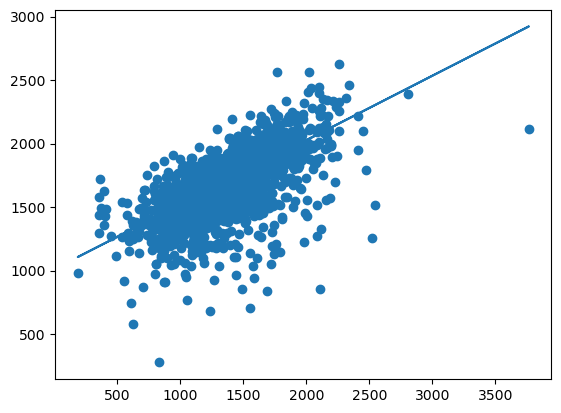

In [22]:
plt.scatter(X_test, Y_test)
Y_predte = model2.predict(X_test)
plt.plot(X_test, Y_predte)

In [23]:
cfp=model2.predict(np.array(df[(df['cf_rating'].isnull()==False) & (df['cc_rating'].isnull()==True)]['cf_rating']).reshape(-1,1))
# df['cc_rating']
df.loc[(df['cf_rating'].isnull()==False) & (df['cc_rating'].isnull()==True), 'cc_rating']=cfp

In [24]:
ccp = (np.array(df[(df['cc_rating'].isnull()==False) & (df['cf_rating'].isnull()==True)]['cc_rating']).reshape(-1,1)-model2.intercept_)/model2.coef_
df.loc[(df['cc_rating'].isnull()==False) & (df['cf_rating'].isnull()==True), 'cf_rating']=ccp

In [25]:
df.isnull().sum()

ss_username      0
cf_username    207
cf_rating        0
cc_username    995
cc_rating        0
dtype: int64

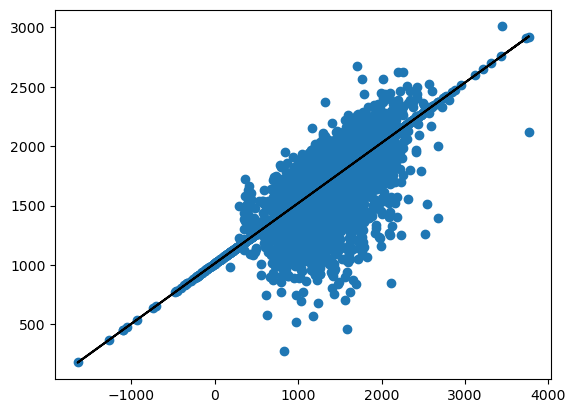

In [26]:
plt.scatter(df['cf_rating'], df['cc_rating'])
plt.plot(df['cf_rating'], model2.predict(np.array(df['cf_rating']).reshape(-1, 1)), color='k')